In [47]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [48]:
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) * blur]
b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) * blur]

data_np = np.hstack((a, b)).T

labels_np = np.vstack((np.zeros((nPerClust, 1)), np.ones((nPerClust, 1))))

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

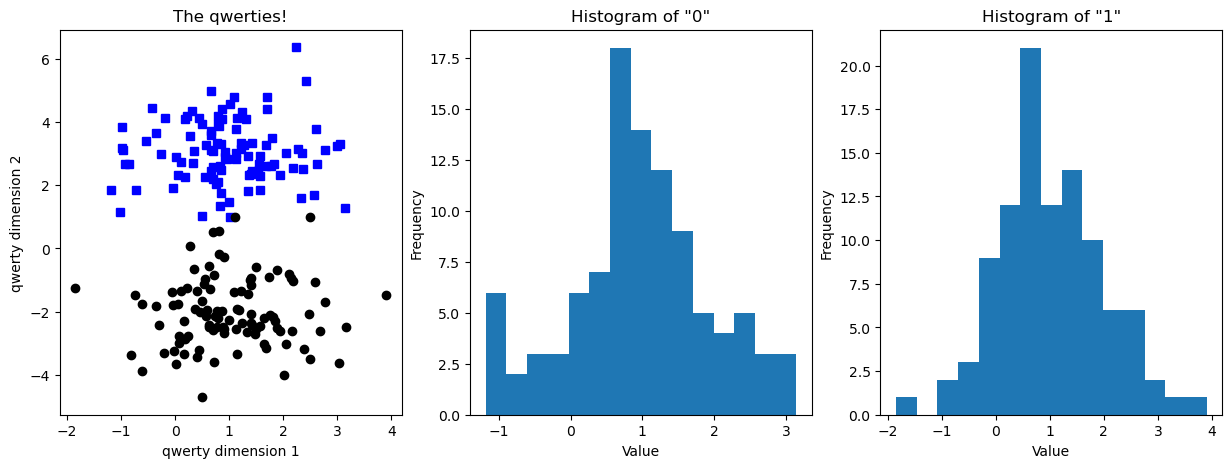

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(data[np.where(labels == 0)[0], 0], data[np.where(labels == 0)[0], 1], 'bs')
ax[0].plot(data[np.where(labels == 1)[0], 0], data[np.where(labels == 1)[0], 1], 'ko')
ax[0].set_title('The qwerties!')
ax[0].set_xlabel('qwerty dimension 1')
ax[0].set_ylabel('qwerty dimension 2')

for i in range(2):
    ax[i + 1].hist(data[np.where(labels == i)[0], 0], bins=15)
    ax[i + 1].set_title(f'Histogram of "{i}"')
    ax[i + 1].set_xlabel('Value')
    ax[i + 1].set_ylabel('Frequency')

plt.show()

# Functions to build and train the model

In [50]:
def createANNmodel(learningRate):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 16),
        nn.ReLU(),
        nn.BatchNorm1d(16),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Linear(32, 1),
        nn.ReLU(),
        nn.Linear(1, 1),
        nn.Sigmoid(),
    )

    lossfun = nn.BCELoss()

    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=learningRate)

    return ANNclassify, lossfun, optimizer

In [51]:
numepochs = 1000


def trainTheModel(ANNmodel):
    losses = torch.zeros(numepochs)

    for epochi in range(numepochs):
        yHat = ANNmodel(data)

        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNmodel(data)

    totalacc = 100 * torch.mean(((predictions > .5) == labels).float())

    return losses, predictions, totalacc

In [53]:
learningrates = np.linspace(.001, .1, 50)

accByLR = []
allLosses = np.zeros((len(learningrates), numepochs))

for i, lr in enumerate(learningrates):
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    accByLR.append(totalacc)
    allLosses[i, :] = losses.detach()


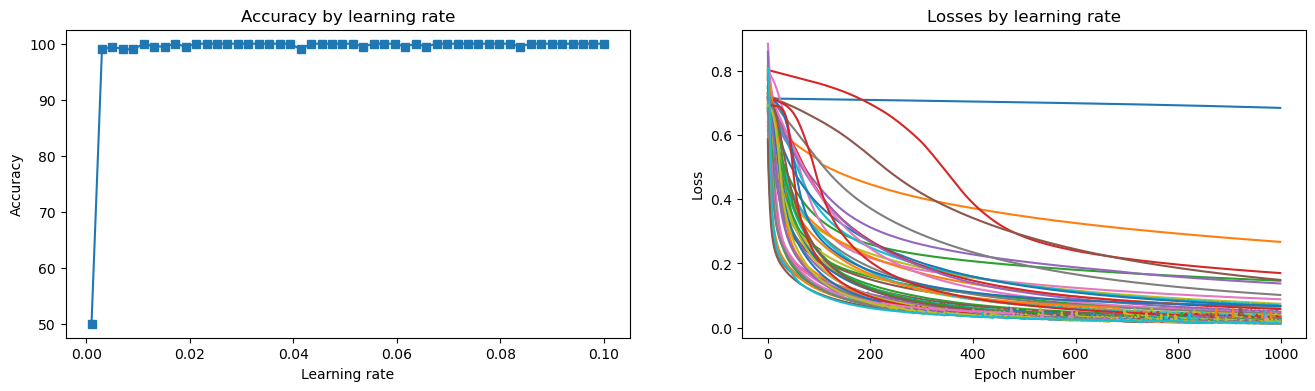

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax[0].plot(learningrates, accByLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()

In [55]:
sum((torch.tensor(accByLR)).int() > 70) / len(accByLR)

tensor(0.9800)